In [1]:
import tensorflow as tf
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import numpy as np

In [2]:
C = io.loadmat('zscore.mat')
print(type(C))
print(C.keys())

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'data', 'en', 'err', 'st'])


In [3]:
color_trial = []
color_start = []
color_end = []
for i in range(len(C['err'][0])):
    if C['err'][0][i] == 1:
        color_trial.append('b')
    else:
        color_trial.append('r')
    if C['st'][0][i] == 2:
        color_start.append('g')
    else:
        color_start.append('y')
    if C['en'][0][i] == 3:
        color_end.append('c')
    else:
        color_end.append('m')
    

In [4]:
data = C["data"][0][0]
data = data[:,:14000]
data = data.reshape((16,14000,1))
for i in range(1,38):
    temp = C["data"][0][i]
    temp = temp[:,-14000:]
    temp = temp.reshape((16,14000,1))
    data = np.concatenate((data,temp),axis = 2)

Fitting rank-8 models:   0%|                              | 0/4 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/tensortools/optimize/ncp_hals.py:185: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  Cp = factors[:, idx] @ grams[idx][:, p]
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
                                                                                

Rank-8 models:  min obj, 0.95;  max obj, 0.96;  time to fit, 9.2s


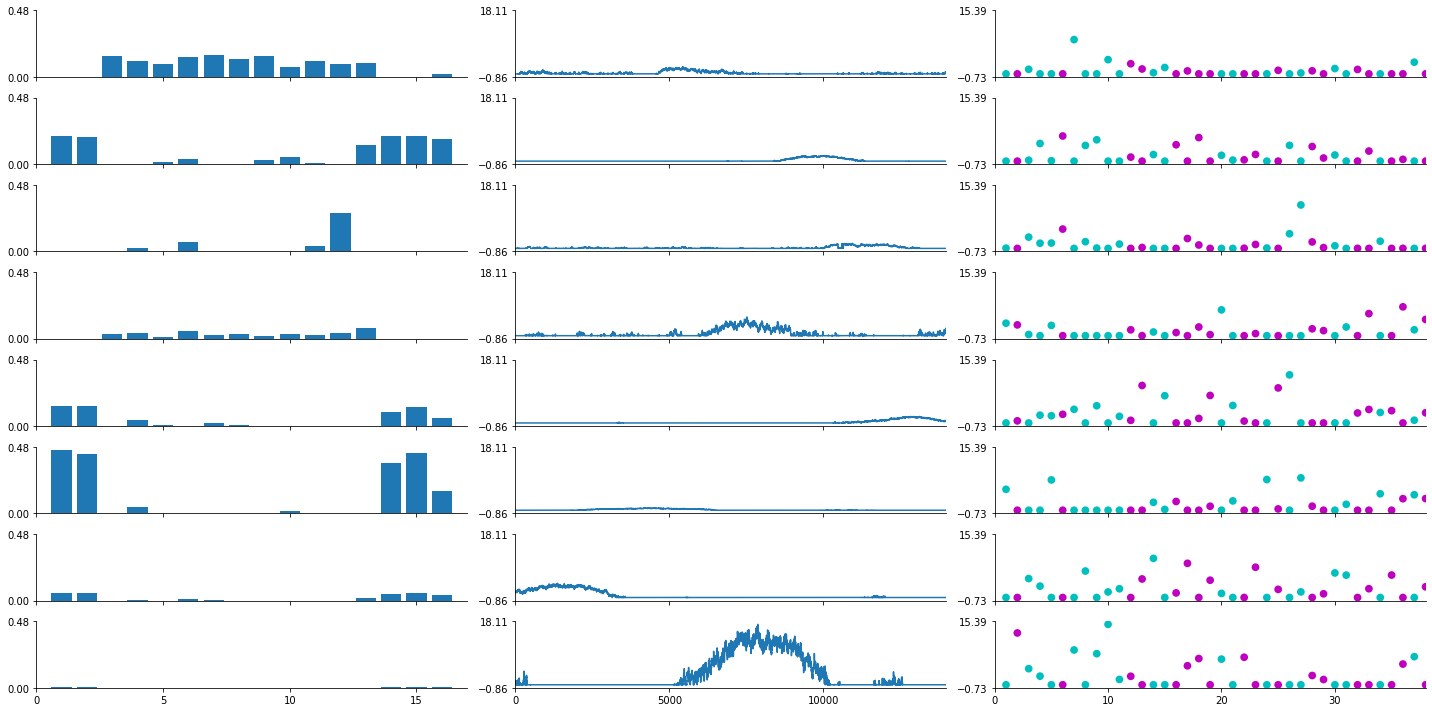

In [5]:
ensemble = tt.Ensemble(fit_method="ncp_hals")
ensemble.fit(data, ranks=8, replicates=4)
fig1, ax = plt.subplots(8,3,figsize=(20, 10))

# Plot the low-d factors for an example model, e.g. rank-2, first optimization run / replicate.
num_components = 8
replicate = 0

tt.plot_factors(ensemble.factors(num_components)[replicate],fig = fig1,axes = ax,plots=['bar','line','scatter'],scatter_kw = {'c':color_end,'s':60})  # plot the low-d factors

plt.show()

In [6]:
fig1.savefig('eeg_ncp_end_zs_f.jpg', format='jpg',dpi = 1000)

In [7]:
#ensemble = tt.Ensemble(fit_method="ncp_hals")
#ensemble.fit(data, ranks=range(1, 12), replicates=4)

#fig, axes = plt.subplots(1, 2,figsize=(20, 10))
#tt.plot_objective(ensemble, ax=axes[0])   # plot reconstruction error as a function of num components.
#tt.plot_similarity(ensemble, ax=axes[1])  # plot model similarity as a function of num components.
#fig.tight_layout()

In [8]:
#fig.savefig('similarity.jpg', format='jpg',dpi = 1000)